# Create a NetCDF-CF file from a comma separated text file

In [1]:
import pandas as pd
import xarray as xr

File that we will modify.

In [148]:
myfile = "./surf-irrad-test-201904.csv"

Read ASCII file containing a timeseries.

In [149]:
mydata = pd.read_csv(myfile, header=0, infer_datetime_format=True, parse_dates=['datetime'],dayfirst=True)

In [150]:
mydata

,datetime,QLI_01,QLI_01.1,QLIraw_01,QLNet_01,QLO_01,QLO_01.1,QLOraw_01,QNet_01,QSI_01,QSI_01.1,QSNet_01,QSO_01,QSO_01.1,TA,TAN,TAX,TIQL(Kelv),TIQL_01,UU_01
0,2019-04-01 12:30:00,287.69,250.06,-69.27,-131.85,377.28,381.76,20.32,373.62,123.18,637.91,505.46,135.37,132.14,6.78,6.78,6.78,281.68,8.53,32.46
1,2019-04-01 12:31:00,287.90,248.93,-68.98,-133.18,377.84,381.41,20.95,348.66,121.01,605.38,481.84,131.95,125.55,6.85,6.85,6.85,281.67,8.52,32.26
2,2019-04-01 12:32:00,288.13,249.85,-68.73,-132.34,376.07,381.96,19.21,354.13,117.73,613.60,486.46,127.54,127.13,6.91,6.91,6.91,281.66,8.51,31.97
3,2019-04-01 12:33:00,290.10,250.96,-67.03,-137.96,383.36,389.03,26.23,357.11,118.14,626.34,495.07,134.04,130.79,7.03,7.03,7.03,281.72,8.57,33.63
4,2019-04-01 12:34:00,289.52,249.11,-67.91,-134.85,380.99,383.80,23.57,360.30,116.55,624.63,495.15,134.88,129.37,7.26,7.26,7.26,281.77,8.62,33.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2019-04-02 07:57:00,317.85,313.39,-10.63,-21.09,332.69,334.52,4.21,40.99,70.31,77.90,62.09,17.46,15.84,2.25,2.25,2.25,275.89,2.74,76.57
1168,2019-04-02 07:58:00,317.80,313.05,-10.72,-21.84,333.13,334.88,4.61,45.00,73.44,83.71,66.84,18.83,16.92,2.28,2.28,2.28,275.90,2.75,76.59
1169,2019-04-02 07:59:00,317.83,312.92,-10.76,-22.02,333.43,335.01,4.84,46.08,76.78,85.70,68.10,19.90,17.64,2.30,2.30,2.30,275.91,2.76,76.52
1170,2019-04-02 08:00:00,318.23,313.60,-10.35,-21.42,333.31,335.02,4.76,43.74,74.20,82.07,65.16,19.57,16.87,2.31,2.31,2.31,275.91,2.76,76.23


<AxesSubplot:xlabel='datetime'>

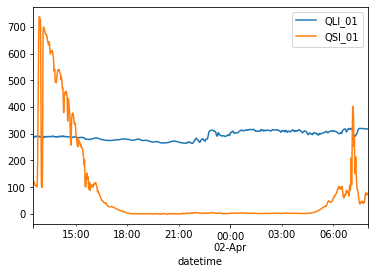

In [46]:
mydata.plot(x='datetime', y=['QLI_01','QSI_01'])

In [49]:
mydata['QSI_01']

0       123.18
1       121.01
2       117.73
3       118.14
4       116.55
         ...  
1167     70.31
1168     73.44
1169     76.78
1170     74.20
1171     73.03
Name: QSI_01, Length: 1172, dtype: float64

Create a Xarray dataset from the Pandas data frame returned when reading the CSV file.

In [116]:
xrds = xr.Dataset.from_dataframe(mydata[['datetime','QLI_01','QSI_01']])

Check content of dataset.

In [117]:
xrds

<xarray.Dataset>
Dimensions:   (index: 1172)
Coordinates:
  * index     (index) int64 0 1 2 3 4 5 6 ... 1165 1166 1167 1168 1169 1170 1171
Data variables:
    datetime  (index) datetime64[ns] 2019-04-01T12:30:00 ... 2019-04-02T08:01:00
    QLI_01    (index) float64 287.7 287.9 288.1 290.1 ... 317.8 318.2 318.6
    QSI_01    (index) float64 123.2 121.0 117.7 118.1 ... 73.44 76.78 74.2 73.03

Modify metadata for variable to make CF compliant. Meaning:
- using standard_names
- identifying units
- identifying missing values
- identifying cell_methods 

Rename datetime to time to be CF compliant.

In [118]:
xrds = xrds.rename_dims({'index':'time'})

In [119]:
xrds = xrds.rename({'datetime':'time'})

In [120]:
xrds

<xarray.Dataset>
Dimensions:  (time: 1172)
Coordinates:
    index    (time) int64 0 1 2 3 4 5 6 7 ... 1165 1166 1167 1168 1169 1170 1171
Dimensions without coordinates: time
Data variables:
    time     (time) datetime64[ns] 2019-04-01T12:30:00 ... 2019-04-02T08:01:00
    QLI_01   (time) float64 287.7 287.9 288.1 290.1 ... 317.8 317.8 318.2 318.6
    QSI_01   (time) float64 123.2 121.0 117.7 118.1 ... 73.44 76.78 74.2 73.03

Specify time as coordinate.

In [121]:
xrds = xrds.set_coords('time')

Get rid of the numeric index as dimension.

In [122]:
xrds = xrds.reset_index('index', drop=True)

Add global attributes according to ACDD.

In [123]:
xrds.attrs={
    'Conventions':'CF-1.8',
    'title':'This is a test file',
    'abstract':'This is a test abstract, to be extended.',
    'creator_name':'Øystein Godøy',
    'creator_email':'o.godoy@sios-svalbard.org',
}

In [124]:
xrds

<xarray.Dataset>
Dimensions:  (time: 1172)
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01T12:30:00 ... 2019-04-02T08:01:00
Data variables:
    QLI_01   (time) float64 287.7 287.9 288.1 290.1 ... 317.8 317.8 318.2 318.6
    QSI_01   (time) float64 123.2 121.0 117.7 118.1 ... 73.44 76.78 74.2 73.03
Attributes:
    Conventions:    CF-1.8
    title:          This is a test file
    abstract:       This is a test abstract, to be extended.
    creator_name:   Øystein Godøy
    creator_email:  o.godoy@sios-svalbard.org

Add CF specific elements on variables. 

In [135]:
xrds['QLI_01'].attrs = {
    'standard_name':'surface_net_downward_longwave_flux',
    'long_name':'longwave downward irradiance at the surface',
    'units': 'Wm-2',
    #'_FillValue': -999.0,
}
xrds['QSI_01'].attrs = {
    'standard_name':'surface_net_downward_shortwave_flux',
    'long_name':'surface downward irradiance at the surface',
    'units': 'Wm-2',
    #'_FillValue': -999.0,
}

In [136]:
xrds

<xarray.Dataset>
Dimensions:  (time: 1172)
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01T12:30:00 ... 2019-04-02T08:01:00
Data variables:
    QLI_01   (time) float64 287.7 287.9 288.1 290.1 ... 317.8 317.8 318.2 318.6
    QSI_01   (time) float64 123.2 121.0 117.7 118.1 ... 73.44 76.78 74.2 73.03
Attributes:
    Conventions:    CF-1.8
    title:          This is a test file
    abstract:       This is a test abstract, to be extended.
    creator_name:   Øystein Godøy
    creator_email:  o.godoy@sios-svalbard.org

Ensure that data are written in the correct form to NetCDF. Data served through THREDDS Data Servers cannot have int64 datetime specifications, but int32. Also, encoding of missingvalues are done in this step along compression.

In [143]:
myencoding = {
    'time': {
        'dtype': 'int32',
    },
    'QLI_01': {
        '_FillValue': -999.0,
        'zlib': False,
    },
    'QSI_01': {
        '_FillValue': -999.0,
        'zlib': False,
    }
}

In [144]:
xrds.to_netcdf('mytest.nc')